In [72]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

In [73]:
T = 1000 # number of time steps
P0 = 10 # initial price
mu = 0.001 # drift
std = 0.01

In [74]:
last_p = np.log(P0) # last log price
log_returns = np.zeros(T)
prices = np.zeros(T)
for t in range(T):
  r = std * np.random.randn() # sample a log return
  p = last_p + mu + r # compute the new log price
  log_returns[t] = r + mu # store the return and price
  prices[t] = np.exp(p)
  last_p = p # assign last_p

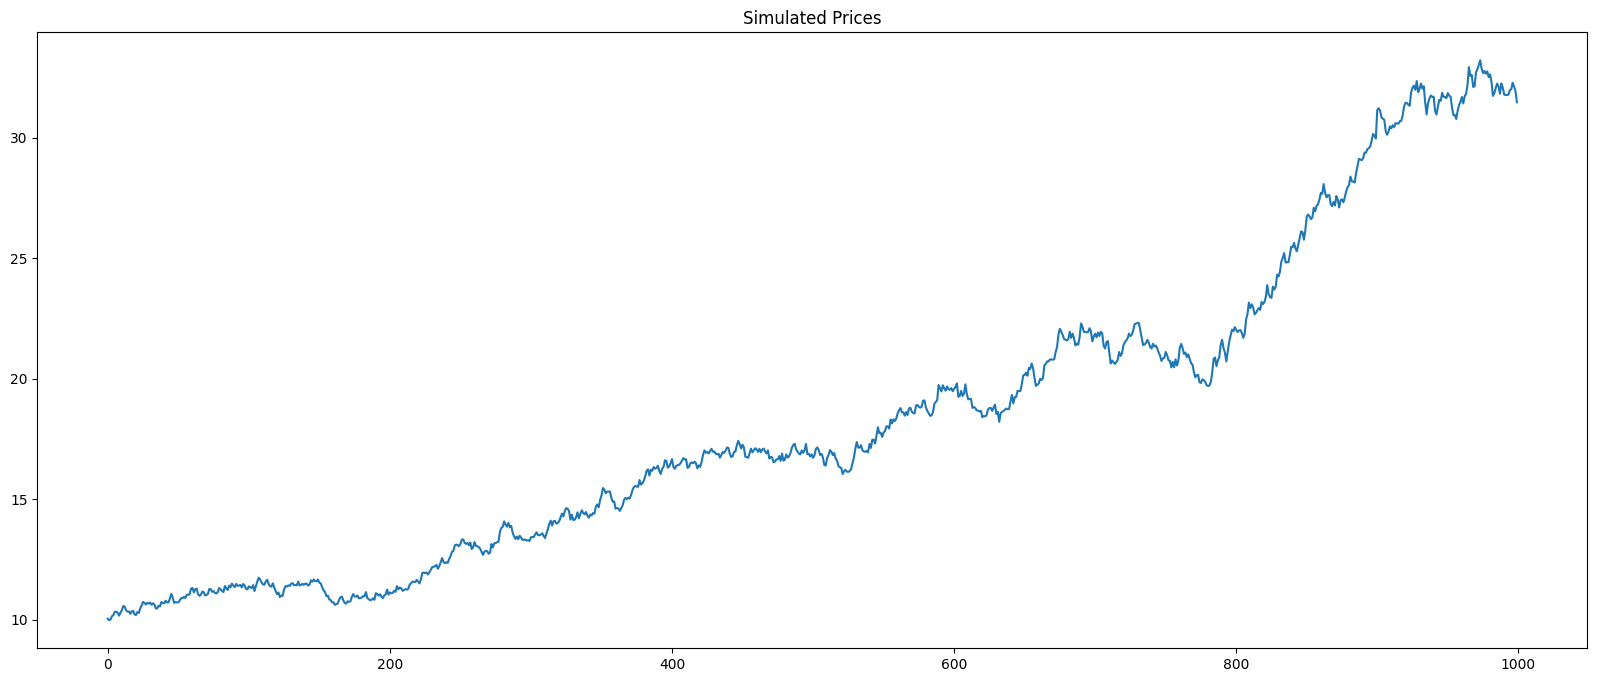

In [75]:
plt.figure(figsize=(20, 8))
plt.plot(prices)
plt.title("Simulated Prices");

In [76]:
# Exercise: vectorize the above loop

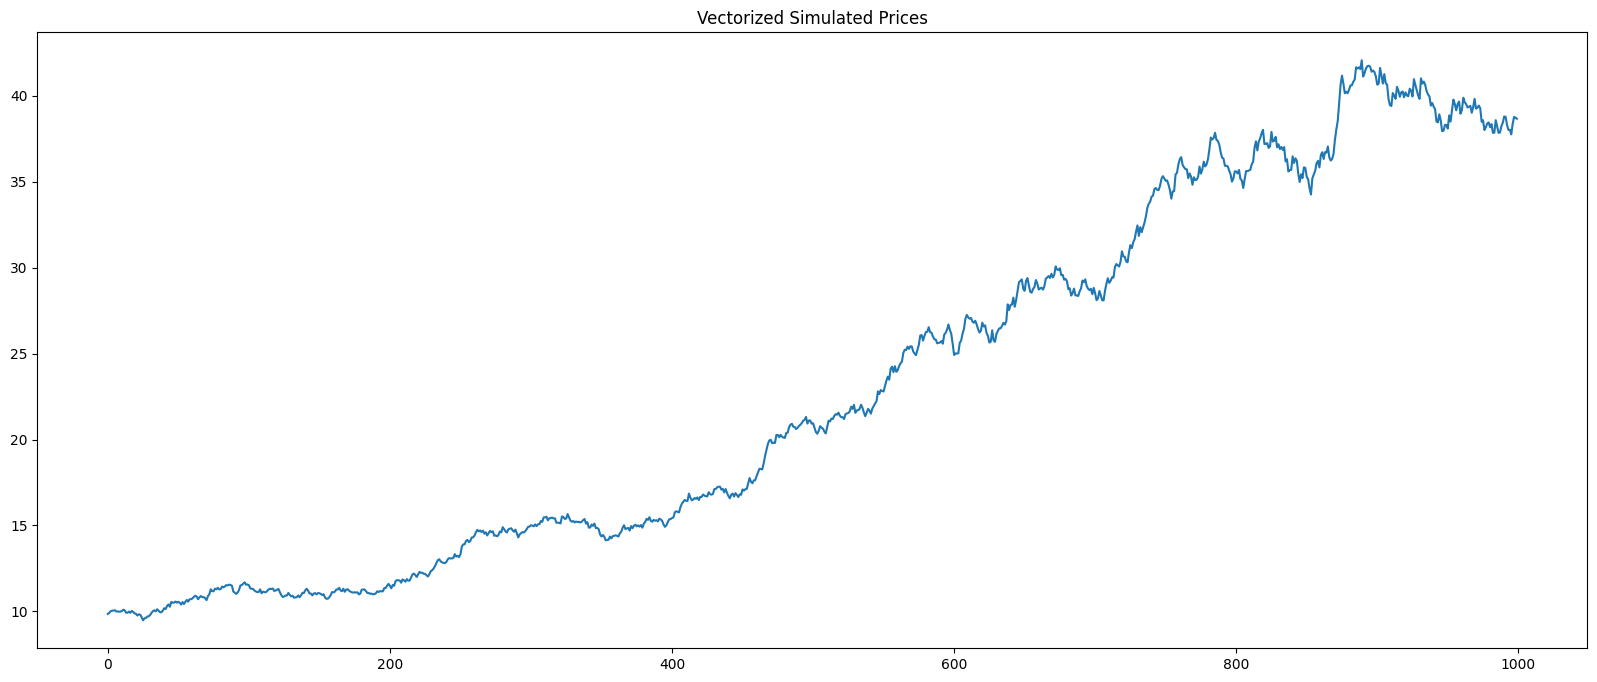

In [77]:
df = pd.DataFrame(columns=['log_returns', 'log_prices', 'prices'])
df['log_returns'] = std * np.random.randn(T) + mu
df['log_prices'] = df['log_returns'].cumsum() + np.log(P0)
df['prices'] = np.exp(df['log_prices'])
plt.figure(figsize=(20, 8))
plt.plot(df['prices'])
plt.title("Vectorized Simulated Prices");

In [78]:
# Comparison of running times of looped and vectorized code
# initial price
P0 = 10
# drift
mu = 0.001
std = 0.01
vectorized_time,loop_time,timeSteps = [],[],[]
for T in range(1000,100000,5000):
  timeSteps.append(T)
  start_time1 = time.process_time()
  # last log price
  last_p = np.log(P0)
  log_returns = np.zeros(T)
  prices = np.zeros(T)
  for t in range(T):
  # sample a log return
    r = std * np.random.randn()
  # compute the new log price
    p = last_p + mu + r
  # store the return and price
    log_returns[t] = r + mu
    prices[t] = np.exp(p)
  # assign last_p
    last_p = p
  end_time1 = time.process_time()
  loop_time.append(end_time1-start_time1)
  start_time2 = time.process_time()
  df = pd.DataFrame(columns=['log_returns', 'log_prices', 'prices'])
  df['log_returns'] = std * np.random.randn(T) + mu
  df['log_prices'] = df['log_returns'].cumsum() + np.log(P0)
  df['prices'] = np.exp(df['log_prices'])
  end_time2 = time.process_time()
  vectorized_time.append(end_time2-start_time2)

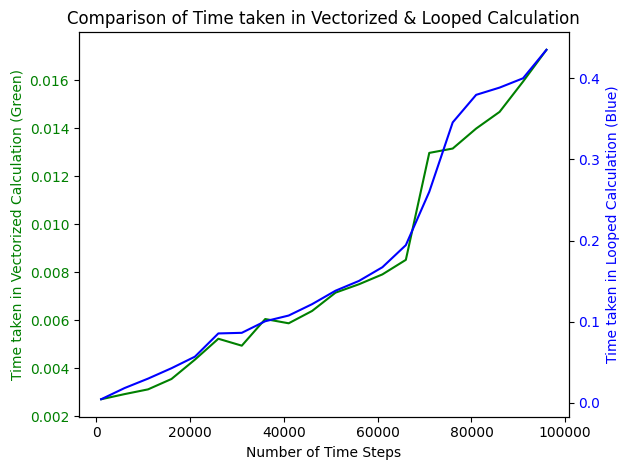

In [79]:
# Create the first plot and axis
fig, ax1 = plt.subplots()

# Plot the first list on the primary y-axis (ax1)
ax1.plot(timeSteps, vectorized_time, 'g-', label='Time taken in Vectorized Calculation')
ax1.set_xlabel('Number of Time Steps')
ax1.set_ylabel('Time taken in Vectorized Calculation (Green)', color='g')
ax1.tick_params(axis='y', labelcolor='g')

# Create a twin axis for the second y-axis
ax2 = ax1.twinx()

# Plot the second list on the secondary y-axis (ax2)
ax2.plot(timeSteps, loop_time, 'b-', label='Time taken in Looped Calculation')
ax2.set_ylabel('Time taken in Looped Calculation (Blue)', color='b')
ax2.tick_params(axis='y', labelcolor='b')

# Add a title and legend
plt.title('Comparison of Time taken in Vectorized & Looped Calculation')
fig.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()